<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных</a></span><ul class="toc-item"><li><span><a href="#Технологический-процесс" data-toc-modified-id="Технологический-процесс-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Технологический процесс</a></span></li><li><span><a href="#Параметры-этапов" data-toc-modified-id="Параметры-этапов-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Параметры этапов</a></span></li><li><span><a href="#Наименование-признаков" data-toc-modified-id="Наименование-признаков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Наименование признаков</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Расчет-эффективности-обогащения" data-toc-modified-id="Расчет-эффективности-обогащения-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Расчет эффективности обогащения</a></span></li><li><span><a href="#Анализ-признаков" data-toc-modified-id="Анализ-признаков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Анализ признаков</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="Концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Концентрация металлов (Au, Ag, Pb) на различных этапах очистки</a></span></li><li><span><a href="#Распределения-размеров-гранул-сырья" data-toc-modified-id="Распределения-размеров-гранул-сырья-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Распределения размеров гранул сырья</a></span></li><li><span><a href="#Суммарная-концентрация-на-разных-стадиях" data-toc-modified-id="Суммарная-концентрация-на-разных-стадиях-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Суммарная концентрация на разных стадиях</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#sMAPE" data-toc-modified-id="sMAPE-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>sMAPE</a></span></li><li><span><a href="#Подготовка-моделей" data-toc-modified-id="Подготовка-моделей-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Подготовка моделей</a></span></li><li><span><a href="#Кросс-валидация" data-toc-modified-id="Кросс-валидация-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Кросс-валидация</a></span></li><li><span><a href="#Тест" data-toc-modified-id="Тест-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Тест</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler 

**Задание:**

Подготовьте прототип модели машинного обучения для компания, которая разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

## Описание данных

### Технологический процесс

- `Rougher feed` — исходное сырье
- `Rougher additions` (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
 - `Xanthate` — ксантогенат (промотер, или активатор флотации);
 - `Sulphate` — сульфат (на данном производстве сульфид натрия);
 - `Depressant` — депрессант (силикат натрия).
- `Rougher process` (англ. «грубый процесс») — флотация
- `Rougher tails` — отвальные хвосты
- `Float banks` — флотационная установка
- `Cleaner process` — очистка
- `Rougher Au` — черновой концентрат золота
- `Final Au` — финальный концентрат золота

### Параметры этапов

- `air amount` — объём воздуха
- `fluid levels` — уровень жидкости
- `feed size` — размер гранул сырья
- `feed rate` — скорость подачи

### Наименование признаков

`[этап].[тип_параметра].[название_параметра]`

Возможные значения для блока `[этап]`:

- `rougher` — флотация
- `primary_cleaner` — первичная очистка
- `secondary_cleaner` — вторичная очистка
- `final` — финальные характеристики

Возможные значения для блока `[тип_параметра]`:

- `input` — параметры сырья
- `output` — параметры продукта
- `state` — параметры, характеризующие текущее состояние этапа
- `calculation` — расчётные характеристики

## Подготовка данных

In [2]:
df_gold_train = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col=['date'])
df_gold_test = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col=['date'])
df_gold_full = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col=['date'])

In [3]:
pd.set_option('display.MAX_columns', None)

In [4]:
df_gold_train.head(3)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.

In [5]:
df_gold_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                             

In [6]:
df_gold_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,14117.000000,14149.000000,14049.000000,14149.000000,14063.000000,13863.000000,14149.000000,14148.000000,14134.000000,14103.000000,14149.000000,14145.000000,14148.000000,14145.000000,14148.000000,14147.000000,14148.000000,14146.000000,14148.000000,1.414800e+04,14148.000000,14148.000000,14149.000000,14149.000000,14049.000000,14141.000000,14005.000000,14071.000000,14149.000000,14120.000000,14141.000000,14113.000000,13721.000000,14149.000000,14149.000000,14127.000000,14149.000000,14149.000000,14148.000000,14149.000000,14149.000000,14149.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14149.000000,14149.000000,13713.000000,14149.000000,14149.000000,14149.000000,14147.000000,14139.000000,12544.000000,14149.000000,13932.000000,14148.000000,14128.000000,14148.000000,14145.000000,14148.000000,14148.000000,14148.000000,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148

In [7]:
df_gold_test.head(3)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559


In [8]:
df_gold_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null

In [9]:
df_gold_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5287.000000,5289.000000,5269.000000,5290.000000,5285.000000,5290.000000,5282.000000,5265.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5287.000000,5290.000000,5288.000000,5290.000000,5281.000000,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,1.544844e+03,-500.199527,9.371940,3.798082,489.800620,55.951097,37.716648,9.334682,13.855759,6.467745,13.922328,6.512103,1053.400166,-395.732530,1318.926879,-475.241428,1301.595477,-474.836671,1214.847960,-475.682272,1056.648995,-469.029688,997.949719,-470.482465,26.312630,-502.750897,21.949119,-501.987097,25.402926,-507.490314,2.098211e+01,-506.627916,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,1.247731e+02,31.045257,1.926264,0.954859,108.036326,19.081758,5.491415,1.619521,3.350852,1.065114,3.223769,0.886989,121.139309,91.085505,156.450366,45.649466,171.269667,45.859866,185.763319,47.844967,131.542839,59.325990,128.218869,60.759318,3.429852,28.756505,4.354961,34.582722,6.526457,47.620908,6.736179e+00,44.528673,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,4.039220e-32,-799.794250,0.568441,0.273677,0.002986,0.046369,1.393488,0.568632,0.001147,0.000568,0.000077,0.006985,-0.042069,-657.949759,-0.721806,-650.245277,-0.056636,-647.544439,-0.992219,-648.390665,-1.982295,-649.267537,-2.593390,-649.949283,0.20

In [10]:
df_gold_full.head(3)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.

In [11]:
df_gold_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                             

In [12]:
df_gold_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,19402.000000,19439.000000,19335.000000,19439.000000,19323.000000,19069.000000,19439.000000,19435.000000,19418.000000,19377.000000,19439.000000,1.943500e+04,19438.000000,1.943500e+04,19438.000000,1.943700e+04,19438.000000,1.943600e+04,19438.000000,1.943700e+04,19437.000000,19437.000000,19439.000000,19439.000000,19339.000000,19428.000000,19294.000000,19340.000000,19439.000000,19405.000000,19431.000000,19395.000000,18986.000000,19439.000000,19439.000000,19416.000000,19439.000000,19439.000000,19438.000000,19439.000000,19439.000000,19439.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19439.000000,19439.000000,19003.000000,19439.000000,19439.000000,19439.000000,19437.000000,19427.000000,17691.000000,19439.000000,19219.000000,19438.000000,19416.000000,19438.000000,19426.000000,19438.000000,19438.000000,19438.000000,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438

Предварительно можем сделать выводы:

- столбец `date` можно перевести в соответствующий тип данных;
- все признаки, кроме даты, необходимо масштабировать;
- в выборках отсутствуют целевые признаки.

### Расчет эффективности обогащения

Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака `rougher.output.recovery`. 

Эффективность обогащения рассчитывается по формуле, где:

- C — доля золота в концентрате после флотации/очистки;
- F — доля золота в сырье/концентрате до флотации/очистки;
- T — доля золота в отвальных хвостах после флотации/очистки.

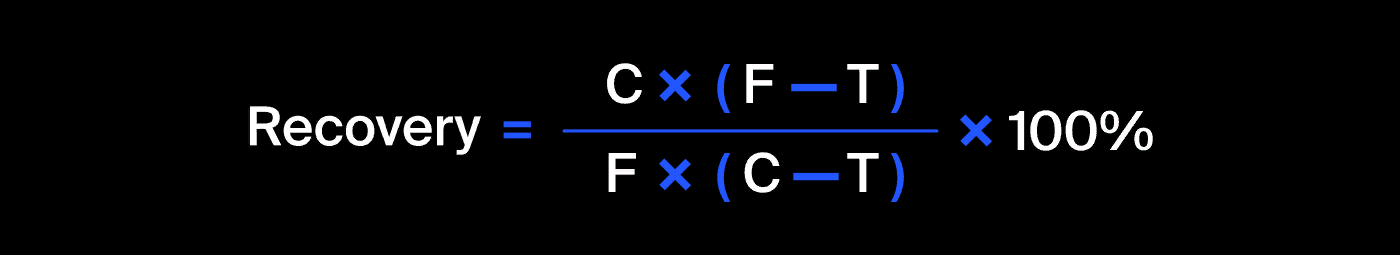

In [13]:
df_gold_train[['final.output.concentrate_au', 'rougher.input.feed_au', 'final.output.tail_au']].head(3)

,final.output.concentrate_au,rougher.input.feed_au,final.output.tail_au
date,,,
2016-01-15 00:00:00,42.192020,6.486150,2.143149
2016-01-15 01:00:00,42.701629,6.478583,2.224930
2016-01-15 02:00:00,42.657501,6.362222,2.257889


In [14]:
df_gold_train['rougher.output.recovery'].head(3)

date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
Name: rougher.output.recovery, dtype: float64

In [15]:
C = df_gold_train['rougher.output.concentrate_au']
F = df_gold_train['rougher.input.feed_au']
T = df_gold_train['rougher.output.tail_au']

recovery_check = C * (F - T) / (F * (C - T)) * 100

recovery_check.head(3)

date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
dtype: float64

Найдем MAE между нашими расчётами и значением признака:

In [16]:
mean_absolute_error(df_gold_train['rougher.output.recovery'], recovery_check)

9.73512347450521e-15

Среднее абсолютное отклонение практически равно нулю, соответственно эффективность обогащения рассчитана правильно.

### Анализ признаков

Создадим список названий столбцов, которых нет в тестовой выборке.

In [17]:
set_gold_train = set(df_gold_train.columns)
set_gold_test = set(df_gold_test.columns)

In [18]:
list_diff = sorted(list(set_gold_train.difference(set_gold_test)))
list_diff

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

In [19]:
df_diff = df_gold_train[list_diff]

Проанализируем признаки, недоступные в тестовой выборке:

In [20]:
df_diff.head(3)

,final.output.concentrate_ag,final.output.concentrate_au,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_ag,final.output.tail_au,final.output.tail_pb,final.output.tail_sol,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_au,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,rougher.calculation.au_pb_ratio,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.sulfate_to_au_concentrate,rougher.output.concentrate_ag,rougher.output.concentrate_au,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_au,rougher.output.tail_pb,rougher.output.tail_sol,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,42.192020,9.889648,5.507324,70.541216,10.411962,2.143149,0.895447,16.904297,8.547551,34.174427,10.389648,19.529297,14.936526,2.106679,2.534912,7.476074,2.838687,3481.779053,3520.337158,41885.707031,11.500771,19.793808,7.101074,28.029297,87.107763,5.008018,1.170244,0.508728,19.154297,14.500184,2.606185,4.694824,8.764648
2016-01-15 01:00:00,6.029369,42.701629,9.968944,5.257781,69.266198,10.462676,2.224930,0.927452,16.634514,8.558743,34.118526,10.497069,19.369147,16.250511,2.353017,3.049646,6.733907,2.858998,3498.370979,3489.981857,42050.861809,11.615865,20.050975,7.278807,28.067063,86.843261,4.955378,1.184827,0.536689,18.965234,14.265474,2.488248,4.592547,9.001494
2016-01-15 02:00:00,6.055926,42.657501,10.213995,5.383759,68.116445,10.507046,2.257889,0.953716,16.208849,8.603505,33.969464,10.354494,19.167579,16.491823,2.416800,3.124664,6.471768,2.945989,3495.348910,3502.359819,42018.101184,11.695753,19.737170,7.216833,27.454037,86.842308,4.843460,1.162562,0.546416,18.808533,14.115662,2.458187,4.624775,8.842896


В тестовой выборке, помимо целевых признаков, отсутсвуют некоторые признаки с параметрами:

- `final.output` - финальные характеристики для концентратов и отвальных хвостов;
- `primary_cleaner.output` - данные первичной очистки для концентратов и отвальных хвостов;
- `rougher.calculation` - расчётные характеристики флотации для золота;
- `rougher.output` - флотации для концентратов и отвальных хвостов;
- `secondary_cleaner.output` - данные вторичной очистки для отвальных хвостов;

Нам известно, что некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже.

### Предобработка данных

Поиск дубликатов:

In [21]:
print(df_gold_train.duplicated().sum(), df_gold_test.duplicated().sum(), 
      df_gold_full.duplicated().sum())

0 0 0


In [22]:
df_gold_full.isna().mean().sort_values(ascending=False)

secondary_cleaner.output.tail_sol           0.089922
rougher.input.floatbank11_xanthate          0.023304
rougher.state.floatbank10_e_air             0.022429
primary_cleaner.output.concentrate_sol      0.019034
secondary_cleaner.state.floatbank2_a_air    0.011317
                                              ...   
rougher.state.floatbank10_d_level           0.000000
rougher.state.floatbank10_d_air             0.000000
rougher.output.tail_sol                     0.000000
rougher.output.tail_au                      0.000000
rougher.output.concentrate_ag               0.000000
Length: 86, dtype: float64

In [23]:
df_gold_train.isna().mean().sort_values(ascending=False)

secondary_cleaner.output.tail_sol           0.113436
rougher.state.floatbank10_e_air             0.030815
rougher.input.floatbank11_xanthate          0.030249
primary_cleaner.output.concentrate_sol      0.020213
secondary_cleaner.state.floatbank2_a_air    0.015337
                                              ...   
rougher.state.floatbank10_d_air             0.000000
rougher.output.concentrate_au               0.000000
rougher.output.recovery                     0.000000
rougher.output.tail_pb                      0.000000
rougher.output.concentrate_ag               0.000000
Length: 86, dtype: float64

In [24]:
df_gold_test.isna().mean().sort_values(ascending=False)

rougher.input.floatbank11_xanthate            0.004726
rougher.input.feed_sol                        0.003970
secondary_cleaner.state.floatbank3_a_air      0.001701
rougher.input.floatbank11_sulfate             0.001512
primary_cleaner.input.depressant              0.000945
rougher.input.floatbank10_sulfate             0.000945
primary_cleaner.input.sulfate                 0.000756
primary_cleaner.input.xanthate                0.000756
rougher.input.feed_rate                       0.000567
secondary_cleaner.state.floatbank2_a_air      0.000567
secondary_cleaner.state.floatbank2_b_air      0.000378
rougher.input.feed_size                       0.000189
secondary_cleaner.state.floatbank3_b_level    0.000000
secondary_cleaner.state.floatbank3_b_air      0.000000
rougher.state.floatbank10_f_air               0.000000
rougher.state.floatbank10_f_level             0.000000
secondary_cleaner.state.floatbank6_a_air      0.000000
secondary_cleaner.state.floatbank5_b_level    0.000000
secondary_

В данных присутствует небольшое количество пропущенных значений.

Исправим тип данных в столбце с датой: 

In [25]:
df_gold_full.index = pd.to_datetime(df_gold_full.index, format='%Y-%m-%d %H:%M:%S')
df_gold_train.index = pd.to_datetime(df_gold_train.index, format='%Y-%m-%d %H:%M:%S')
df_gold_test.index = pd.to_datetime(df_gold_test.index, format='%Y-%m-%d %H:%M:%S')

Заполним пропуски в выборках предыдущими значениями по столбцу, т.к. по условию: соседние по времени параметры часто похожи.

In [26]:
df_gold_train.fillna(method='ffill', inplace=True)
df_gold_test.fillna(method='ffill', inplace=True)

Приведем выборки к одинаковому количеству столбцов.

In [27]:
print(df_gold_train.shape, df_gold_test.shape)

(14149, 86) (5290, 52)


In [28]:
df_train = df_gold_train.drop(list_diff, axis=1)
df_test = df_gold_test

In [29]:
print(df_train.shape, df_test.shape)

(14149, 52) (5290, 52)


Добавим целевые признаки:

In [30]:
df_train = df_train.join(df_gold_full[['rougher.output.recovery', 'final.output.recovery']])
df_test = df_test.join(df_gold_full[['rougher.output.recovery', 'final.output.recovery']])

Удалим аномальные значения в столбцах:

In [31]:
(df_gold_full == 0).sum().sort_values(ascending=False).head()

secondary_cleaner.output.tail_au     849
secondary_cleaner.output.tail_sol    849
secondary_cleaner.output.tail_pb     849
secondary_cleaner.output.tail_ag     849
rougher.output.concentrate_ag        394
dtype: int64

In [32]:
for i in df_gold_full.columns:
    
    df_gold_full = df_gold_full.loc[df_gold_full[i] != 0]  

In [33]:
df_gold_full = df_gold_full.reset_index(drop=True)

In [34]:
df_train = df_train.loc[df_train['rougher.output.recovery'] != 0].reset_index(drop=True)
df_train = df_train.loc[df_train['final.output.recovery'] != 0].reset_index(drop=True)

In [35]:
df_test = df_test.loc[df_test['rougher.output.recovery'] != 0].reset_index(drop=True)
df_test = df_test.loc[df_test['final.output.recovery'] != 0].reset_index(drop=True)

Подготовим признаки для моделей:

In [36]:
target_rougher_test = df_test['rougher.output.recovery']
target_final_test = df_test['final.output.recovery']

features_test = df_test.drop(columns=['rougher.output.recovery', 'final.output.recovery'], axis=1)

In [37]:
target_rougher_train = df_train['rougher.output.recovery']
target_final_train = df_train['final.output.recovery']

features_train = df_train.drop(columns=['rougher.output.recovery', 'final.output.recovery'], axis=1)

Приведем количественные признаки к одному масштабу с помощью стандартизации данных.

In [38]:
scaler = StandardScaler()
scaler.fit(features_train)

features_train[features_train.columns] = scaler.transform(features_train[features_train.columns])
features_test[features_test.columns] = scaler.transform(features_test[features_test.columns])

In [39]:
features_train.head(3)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,-0.167946,0.378919,-0.119465,0.280525,-0.447762,-0.287875,-0.430472,-0.810633,-0.435251,-0.260750,0.050385,-0.218093,-1.305803,-1.114292,0.467225,-0.206759,0.102748,-0.712455,0.088170,0.122535,0.134466,0.146216,-0.733775,-0.356807,1.537767,0.512811,1.415903,0.407297,1.844940,0.252656,1.704269,0.165069,2.160192,0.223192,-0.669500,0.056282,-0.172918,0.031022,-0.941018,-0.314885,-0.148329,-0.253867,-1.055447,-0.473230,-0.649344,-0.754028,-1.184765,-0.379743,-0.870199,-0.428883,-0.961635,-2.670289
1,-0.205154,0.428690,-0.119465,0.317483,-0.243316,-0.343244,-0.244498,-0.322201,-0.241536,-0.278895,0.122211,-0.336531,-1.273673,-1.131607,0.484081,-0.129128,-0.109592,-0.716398,0.083416,0.120508,0.177410,0.151725,-0.730339,-0.314356,1.525368,0.247110,1.406965,0.270672,1.852551,0.276744,1.676161,0.246305,2.065335,0.255381,-0.664769,0.031854,-0.173606,0.047543,-0.939466,-0.403135,-0.119258,-0.256387,-1.059760,-0.532711,-0.677695,-0.696222,-1.165269,-0.428484,-0.886619,-0.431739,-0.988347,-2.507041
2,-0.251178,0.730962,-0.119465,0.287187,-0.046628,-0.318039,-0.059133,-0.344112,-0.048642,-0.322404,0.211716,-0.355809,-1.297298,-1.229199,0.529848,-0.119079,-0.065674,-0.777035,0.067821,0.295132,0.156976,0.307878,-0.733700,-0.314450,1.517582,0.246149,1.403161,0.268454,1.849305,0.276735,1.675914,0.262793,2.068740,0.248165,-0.643260,0.032856,-0.174084,0.054263,-0.949572,-0.391367,0.255269,-0.267213,-1.055766,-0.473879,-0.684858,-0.692838,-1.159835,-0.427413,-0.881581,-0.430080,-0.983055,-2.551263


In [40]:
features_test.head(3)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,1.961281,1.820545,1.227753,0.323751,-1.615943,-0.324368,-1.585693,-0.323791,-1.545997,-0.317768,-0.504473,-0.348442,2.412243,1.959738,0.141050,0.106172,1.151933,2.204723,1.609793,0.255126,1.489640,0.264031,-0.721070,0.213537,-0.403121,1.133675,-0.246887,1.174205,-0.072526,1.183606,-0.466102,1.154298,-0.501489,1.173664,-0.827300,0.023484,-1.662176,0.053274,-1.640005,0.506142,-1.739537,0.923974,-1.405630,-0.380669,-1.424210,-0.695498,-1.524368,1.349791,-1.425066,-0.417749,1.230368,0.191218
1,2.078072,1.818871,1.227753,0.285071,-1.617518,-0.319696,-1.593958,-0.319610,-1.575306,-0.276799,-0.502664,-0.368481,2.363420,1.858263,0.144054,0.073714,0.983999,2.118673,1.634347,0.114382,1.524267,0.143367,-0.739801,0.212217,-0.410500,1.119054,-0.248001,1.170011,-0.061908,1.175450,-0.463262,1.154996,-0.497875,1.039175,-0.829841,0.034787,-1.664962,0.041279,-1.645263,0.511302,-1.718345,0.918558,-1.399553,-0.398422,-1.402516,-0.667232,-1.522359,-1.101237,-1.423970,-0.420957,0.936004,0.188252
2,2.074702,1.195812,0.751628,0.299886,-1.619720,-0.342227,-1.587851,-0.319207,-1.561032,-0.358259,-0.502703,-0.353399,2.417450,1.767004,0.139352,0.287824,1.257349,2.208490,1.631261,-0.020872,1.520504,0.022438,-0.740834,0.219029,-0.415745,1.113504,-0.254165,1.144149,-0.065433,1.160209,-0.463673,1.159497,-0.497188,1.126219,-0.832383,0.026605,-1.654035,0.037613,-1.636190,0.508573,-1.721366,0.928031,-1.416379,-0.399837,-1.408984,-0.687612,-1.503005,-0.445039,-1.419424,-0.412383,0.931626,0.166598


## Анализ данных

### Концентрация металлов (Au, Ag, Pb) на различных этапах очистки

In [41]:
df_gold_full[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au',
             'final.output.concentrate_au']].median()

rougher.input.feed_au                     8.086987
rougher.output.concentrate_au            20.314645
primary_cleaner.output.concentrate_au    32.837665
final.output.concentrate_au              45.009343
dtype: float64

Text(0.5, 1.0, 'Au')

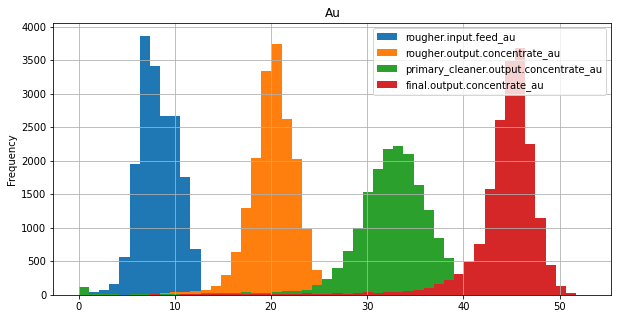

In [42]:
df_gold_full[['rougher.input.feed_au', 'rougher.output.concentrate_au', 
              'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']].plot(
    kind='hist', figsize=(10, 5), grid=True, bins=50)

plt.title('Au')

Text(0.5, 1.0, 'Au')

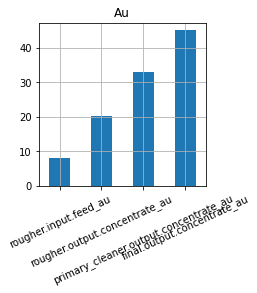

In [43]:
df_gold_full[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au',
             'final.output.concentrate_au']].median().plot(
    kind='bar', figsize=(3, 3), grid=True)


plt.xticks(rotation=25)
plt.title('Au')

In [44]:
df_gold_full[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 
              'final.output.concentrate_ag']].median()

rougher.input.feed_ag                     8.559773
rougher.output.concentrate_ag            12.129965
primary_cleaner.output.concentrate_ag     8.525590
final.output.concentrate_ag               5.051731
dtype: float64

Text(0.5, 1.0, 'Ag')

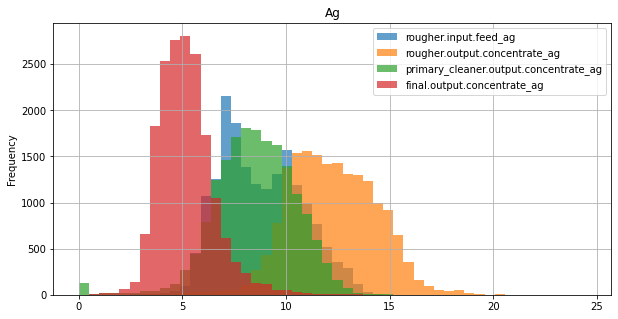

In [45]:
df_gold_full[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 
              'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']].plot(
    kind='hist', figsize=(10, 5), grid=True, alpha=0.7, bins=50)

plt.title('Ag')

Text(0.5, 1.0, 'Ag')

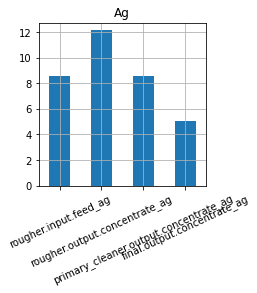

In [46]:
df_gold_full[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 
              'final.output.concentrate_ag']].median().plot(
    kind='bar', figsize=(3, 3), grid=True)

plt.xticks(rotation=25)
plt.title('Ag')

In [47]:
df_gold_full[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 
              'final.output.concentrate_pb']].median()

rougher.input.feed_pb                     3.516071
rougher.output.concentrate_pb             7.761659
primary_cleaner.output.concentrate_pb    10.184256
final.output.concentrate_pb              10.120284
dtype: float64

Text(0.5, 1.0, 'Pb')

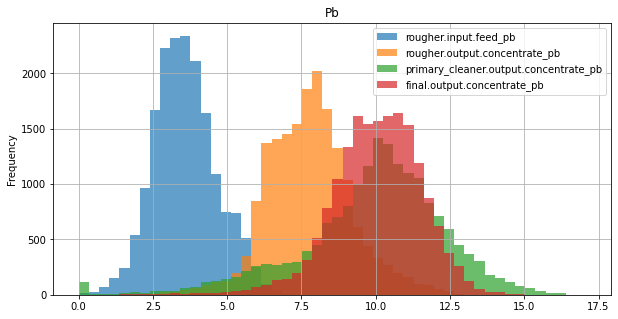

In [48]:
df_gold_full[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 
              'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']].plot(
    kind='hist', figsize=(10, 5), grid=True, alpha=0.7, bins=50)

plt.title('Pb')

Text(0.5, 1.0, 'Pb')

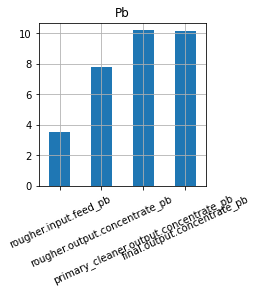

In [49]:
df_gold_full[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 
              'final.output.concentrate_pb']].median().plot(
    kind='bar', figsize=(3, 3), grid=True)

plt.xticks(rotation=25) 
plt.title('Pb')

По графикам и медианным значениям мы видим, что в процессе очистки:

- концентрация золота увеличивается более чем в 5 раз, 
- концентрация серебра уменьшается примерно в 1,5 раза,
- концентрация свинца увеличивается почти в 3 раза.

### Распределения размеров гранул сырья

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках:

<AxesSubplot:ylabel='Frequency'>

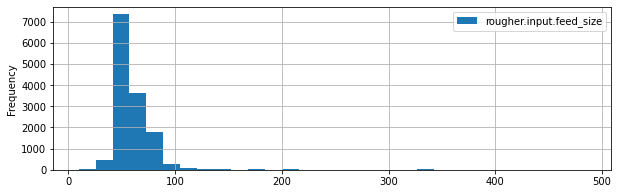

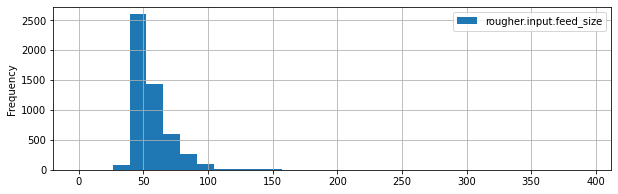

In [50]:
df_train[['rougher.input.feed_size']].plot(kind='hist', figsize=(10, 3), grid=True, bins=30)
df_test[['rougher.input.feed_size']].plot(kind='hist', figsize=(10, 3), grid=True, bins=30)

По гистограммам мы видим, что распределения имеют схожий характер.

### Суммарная концентрация на разных стадиях

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [52]:
df_stages = pd.DataFrame()

In [53]:
df_stages['feed'] = df_gold_full['rougher.input.feed_ag'] + df_gold_full['rougher.input.feed_pb'] + df_gold_full['rougher.input.feed_sol'] + df_gold_full['rougher.input.feed_au']
df_stages['rougher'] = df_gold_full['rougher.output.concentrate_ag'] + df_gold_full['rougher.output.concentrate_pb'] + df_gold_full['rougher.output.concentrate_sol'] + df_gold_full['rougher.output.concentrate_au']
df_stages['final'] = df_gold_full['final.output.concentrate_ag'] + df_gold_full['final.output.concentrate_pb'] + df_gold_full['final.output.concentrate_sol'] + df_gold_full['final.output.concentrate_au']

In [54]:
df_stages.head()

,feed,rougher,final
0,51.680034,66.424950,63.644396
1,50.659114,67.012710,63.957723
2,50.609929,66.103793,64.311180
3,51.061546,65.752751,63.573449
4,47.859163,65.908382,64.004667


In [55]:
df_stages.describe()

,feed,rougher,final
count,17732.000000,17876.000000,17692.000000
mean,57.451368,69.591638,69.124729
std,7.023222,7.598231,5.268604
min,8.072476,5.577864,5.945843
25%,53.630047,66.291221,67.968553
50%,57.667618,70.270941,69.644377
75%,62.012582,74.422049,71.379834
max,76.978947,88.140119,80.210644


array([[<AxesSubplot:title={'center':'feed'}>,
        <AxesSubplot:title={'center':'rougher'}>],
       [<AxesSubplot:title={'center':'final'}>, <AxesSubplot:>]],
      dtype=object)

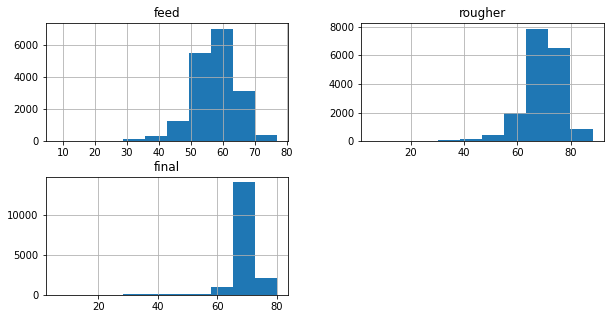

In [56]:
df_stages.hist(figsize=(10, 5))

Исходя из полученных данных, суммарная концентрация на разных стадиях чаще всего находится в диапазоне: 

- в сырье (feed) - от 53 до 62;

- в черновом концентрате (rougher) - от 66 до 74;

- финальном концентрате (final) - от 68 до 71.

Т.е. суммарная концентрация веществ увеличивается после флотации, но почти не меняется после прохождения всех этапов очистки.

## Модель

### sMAPE

Напишем функцию для вычисления итоговой sMAPE:

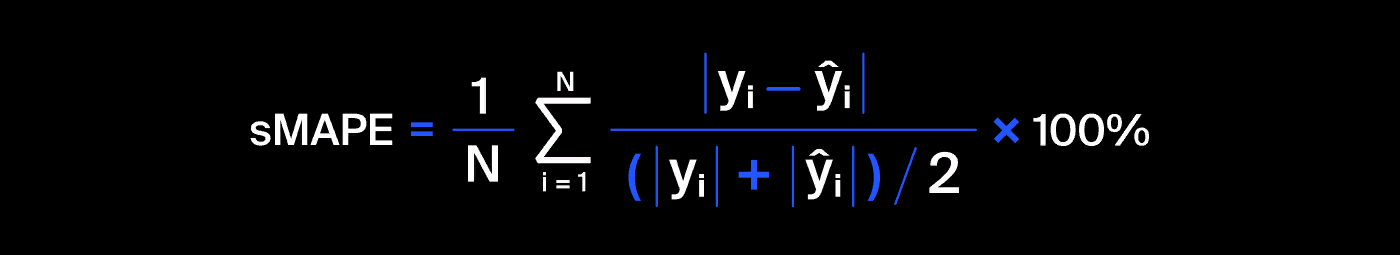

In [58]:
def sMAPE(target, predict):
    
    sMAPE = 1 / len(target) * sum(abs(target - predict) /
                                  ((abs(target) + abs(predict)) / 2)) * 100
    
    return sMAPE

In [59]:
scorer = make_scorer(sMAPE, greater_is_better=False) 

### Подготовка моделей

Определим гиперпараметры и подготовим модели.

In [60]:
state = 12345

In [75]:
rfr = RandomForestRegressor(random_state=state)

parametrs = {'n_estimators': range (13, 14, 2),
              'max_depth': range (5, 6, 2)}
            
grid = GridSearchCV(rfr, parametrs, cv=3, scoring=scorer)  #n_jobs=1

In [76]:
grid.fit(features_train, target_rougher_train)
grid.best_params_

{'max_depth': 5, 'n_estimators': 13}

In [77]:
grid.fit(features_train, target_final_train)
grid.best_params_

{'max_depth': 5, 'n_estimators': 13}

In [64]:
model_rougher_forest = RandomForestRegressor(max_depth=5, n_estimators=13, random_state=state)
model_final_forest = RandomForestRegressor(max_depth=5, n_estimators=13, random_state=state)

model_rougher_lr = LinearRegression()
model_final_lr = LinearRegression()

### Кросс-валидация

Оценим качество разных моделей:

#### Random Forest

In [65]:
f_smape_rougher = cross_val_score(model_rougher_forest, features_train, target_rougher_train, 
                scoring=scorer, cv=5).mean()
f_smape_rougher

-6.693158633198772

In [66]:
f_smape_final = cross_val_score(model_final_forest, features_train, target_final_train, 
                              scoring=scorer, cv=5).mean()
f_smape_final

-9.523609477949263

In [67]:
f_sMAPE_full = 0.25 * f_smape_rougher + 0.75 * f_smape_final

print('sMAPE =', f_sMAPE_full)

sMAPE = -8.81599676676164


#### Linear Regression

In [68]:
lr_smape_rougher = cross_val_score(model_rougher_lr, features_train, target_rougher_train, 
                                scoring=scorer, cv=5).mean()
lr_smape_rougher

-7.267806730900354

In [69]:
lr_smape_final = cross_val_score(model_final_lr, features_train, target_final_train, 
                              scoring=scorer, cv=5).mean()
lr_smape_final

-10.990200515158014

In [70]:
lr_sMAPE_full = 0.25 * lr_smape_rougher + 0.75 * lr_smape_final

print('sMAPE =', lr_sMAPE_full)

sMAPE = -10.059602069093598


По результатам кросс-валидации, наилучшее значение метрики показывает модель - Случайный лес.

### Тест

Для проверки на тестовой выборке выбираем модель Случайный лес.

In [71]:
model_rougher_forest.fit(features_train, target_rougher_train)

prediction_rougher = model_rougher_forest.predict(features_test) 

In [72]:
model_final_forest.fit(features_train, target_final_train)

prediction_final = model_final_forest.predict(features_test)

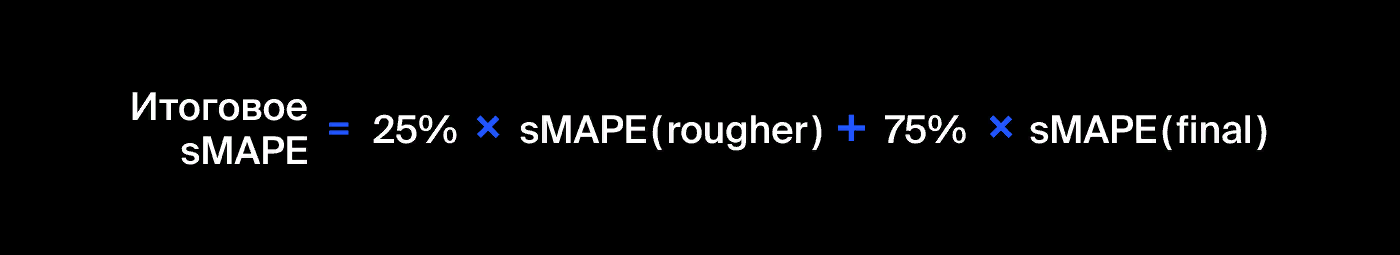

In [73]:
smape_rougher = sMAPE(target_rougher_test, prediction_rougher)
smape_final = sMAPE(target_final_test, prediction_final)

In [74]:
sMAPE_full = 0.25 * smape_rougher + 0.75 * smape_final

print('sMAPE =', sMAPE_full)

sMAPE = 7.413018936759567


Значение метрики получилось равным 7,41.